
## Observations and Insights 

* There was a nearly equal distribution of male and female mice in the study. The drug regimens did not have differing results based on the sex of the mice.

* Capomulin and Ramicane have the lowest mean and median Tumor Volume (mm3). In addition, the final tumor volume for the Capomulin and Ramicane drug regimens were, on average, the lowest of the four drug regimens analyzed in further detail. The data from this study concludes Capomulin is equally effective as Ramicane at slowing the growth of SCC tumors in mice.

* There is a strong correlation between the mouse weight and tumor volume. The higher the weight of the mouse the more likely it is for the tumor volume to be high as well.

* Capomulin and Ramicane had the lowest variance of the drug regimens. This could be because those two drug regimens had the most tumor volume measurements taken across mice at the given timepoints. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study = pd.merge(study_results, mouse_metadata, how='outer', on='Mouse ID')

# Display the data table for preview
mouse_study

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [2]:
# Checking the number of mice.
num_mice = len(pd.unique(mouse_study['Mouse ID']))
# printing number of mice
print(f"Number of Mice: {num_mice}")

Number of Mice: 249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mouse_id = mouse_study.loc[mouse_study.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()

# Optional: Get all the data for the duplicate mouse ID. 
dup_mice_df = mouse_study[mouse_study.duplicated(['Mouse ID', 'Timepoint'])]
# creating a list of the duplicate rows for that Mouse ID
dup_row_list = list(dup_mice_df.index.values)

In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_ms = mouse_study.drop(mouse_study.index[[dup_row_list]])
clean_ms.head()

C:\Users\Mary\Anaconda3\lib\site-packages\pandas\core\indexes\base.py:4291: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [5]:
# Checking the number of mice in the clean DataFrame.
num_mice = len(pd.unique(clean_ms['Mouse ID']))
# printing number of mice to confirm I didn't delete the entire mouse, just the duplicate entries for that mouse
print(f"Number of Mice: {num_mice}")

Number of Mice: 249


## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

# doing my calculations for all the variables
dr_group = clean_ms[["Drug Regimen", "Tumor Volume (mm3)"]].groupby(["Drug Regimen"])
dr_mean = dr_group["Tumor Volume (mm3)"].mean()
dr_median = dr_group["Tumor Volume (mm3)"].median()
dr_variance = dr_group["Tumor Volume (mm3)"].var()
dr_stdv = dr_group["Tumor Volume (mm3)"].std()
dr_sem = dr_group["Tumor Volume (mm3)"].sem()

drug_reg_summary = pd.DataFrame({"Mean": dr_mean, "Median": dr_median, "Variance": dr_variance, "Standard Deviation": dr_stdv, "SEM": dr_sem})
drug_reg_summary.head(10)

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
drug_reg_summary_two = clean_ms.groupby('Drug Regimen').agg(
    Mean=('Tumor Volume (mm3)', 'mean'),
    Median=('Tumor Volume (mm3)', 'median'),
    Variance=('Tumor Volume (mm3)', 'var'),
    Standard_Deviation=('Tumor Volume (mm3)', 'std'),
    SEM=('Tumor Volume (mm3)', 'sem'))

drug_reg_summary_two.head(20)

,Mean,Median,Variance,Standard_Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

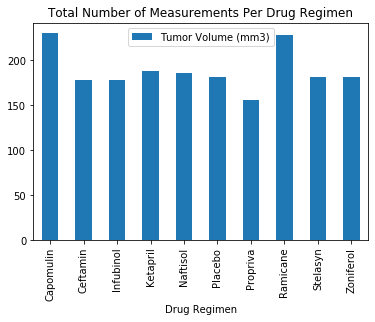

In [8]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
# getting variables for graph and making it
num_measurements = pd.DataFrame(dr_group.count())
num_measurements.plot(kind="bar", title="Total Number of Measurements Per Drug Regimen")
plt.show()

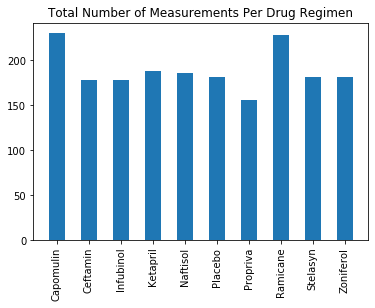

In [36]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
# getting variables for graph
num_measurements_list = num_measurements["Tumor Volume (mm3)"].tolist()
x_axis = np.arange(len(num_measurements_list))
bar_plot = plt.bar(x_axis, num_measurements_list, width=0.5)
# making the graph prettier like the pandas
tick_locations = [value for value in x_axis]
drug_regimens = list(num_measurements.index.values)
plt.xticks(tick_locations, drug_regimens, rotation='vertical')
plt.title("Total Number of Measurements Per Drug Regimen")
plt.show()

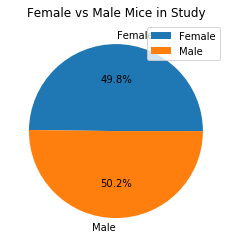

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# getting variables for graph
single_mice = clean_ms.drop_duplicates(subset=['Mouse ID'])
sex_count = pd.DataFrame(single_mice[["Sex", "Mouse ID"]].groupby(["Sex"]).count())
sex_count
# creating the pie chart and labeling
count_pie = sex_count.plot(kind="pie", y="Mouse ID", title="Female vs Male Mice in Study", autopct='%1.1f%%')
count_pie.set_ylabel("")
plt.show()

Text(0.5, 1.0, 'Female vs Male Mice in Study')

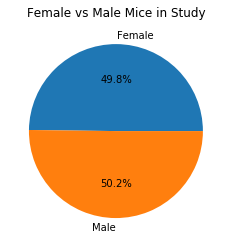

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# getting my variables for the pie chart
labels = ["Female", "Male"]
counts = pd.DataFrame(single_mice[["Sex", "Mouse ID"]].groupby(["Sex"]).count())['Mouse ID'].tolist()
# creating the pie chart
plt.pie(counts, labels=labels, autopct='%1.1f%%')
plt.title("Female vs Male Mice in Study")

## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
drop_timepoints = clean_ms.drop_duplicates(subset="Mouse ID", keep='last', inplace=False)
g_timepoint = drop_timepoints[["Mouse ID", "Timepoint"]]

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
#clean_ms.head(20)
new_clean_ms = g_timepoint.merge(clean_ms, how='left', on=['Mouse ID', 'Timepoint'])
new_clean_ms = new_clean_ms.rename(columns={"Tumor Volume (mm3)":"Final Tumor Volume"})
new_clean_ms.head(20)

,Mouse ID,Timepoint,Final Tumor Volume,Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,35,71.905117,0,Ketapril,Female,2,29
3,a457,10,49.783419,0,Ketapril,Female,11,30
4,c819,40,62.175705,1,Ketapril,Male,21,25
5,h246,45,74.104086,2,Ketapril,Male,13,30
6,p189,45,75.294936,4,Ketapril,Male,8,28
7,n923,40,66.229606,3,Ketapril,Male,19,30
8,q119,10,51.236606,0,Ketapril,Male,17,30
9,f993,20,52.079510,1,Naftisol,Male,21,28


In [13]:
# Put treatments into a list for for loop (and later for plot labels)
drug_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
capo_vol_list = new_clean_ms[new_clean_ms["Drug Regimen"] == "Capomulin"]["Final Tumor Volume"]
rami_vol_list = new_clean_ms[new_clean_ms["Drug Regimen"] == "Ramicane"]["Final Tumor Volume"]
infu_vol_list = new_clean_ms[new_clean_ms["Drug Regimen"] == "Infubinol"]["Final Tumor Volume"]
ceft_vol_list = new_clean_ms[new_clean_ms["Drug Regimen"] == "Ceftamin"]["Final Tumor Volume"]

# creating a dictionary to loop through to print IQR results
drug_dict = {
    "Capomulin": capo_vol_list,
    "Ramicane": rami_vol_list,
    "Infubinol": infu_vol_list,
    "Ceftamin": ceft_vol_list
}

for key in drug_dict:
    print(key)
    quartiles = drug_dict[key].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f"The lower quartile of {key} is: {lowerq}")
    print(f"The upper quartile of {key} is: {upperq}")
    print(f"The interquartile range of {key} is: {iqr}")
    print(f"The the median of {key} is: {quartiles[0.5]} ")
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    print("----------------------------------")

    # Determine outliers using upper and lower bounds
    

Capomulin
The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capomulin is: 40.1592203
The interquartile range of Capomulin is: 7.781863460000004
The the median of Capomulin is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
----------------------------------
Ramicane
The lower quartile of Ramicane is: 31.56046955
The upper quartile of Ramicane is: 40.65900627
The interquartile range of Ramicane is: 9.098536719999998
The the median of Ramicane is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
----------------------------------
Infubinol
The lower quartile of Infubinol is: 54.04860769
The upper quartile of Infubinol is: 65.52574285
The interquartile range of Infubinol is: 11.477135160000003
The the median of Infubinol is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
---------

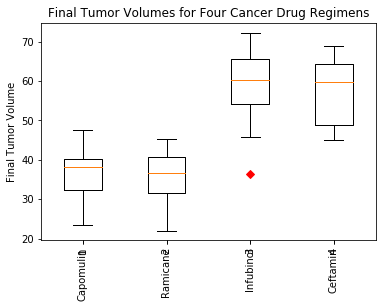

In [14]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
total_vol = [capo_vol_list, rami_vol_list, infu_vol_list, ceft_vol_list]
tick_locals = [1, 2, 3, 4]
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volumes for Four Cancer Drug Regimens')
ax1.set_ylabel('Final Tumor Volume')
plt.xticks(tick_locals, drug_regimens, rotation='vertical')
ax1.boxplot(total_vol, 0, "rD")

plt.show()


## Line and Scatter Plots

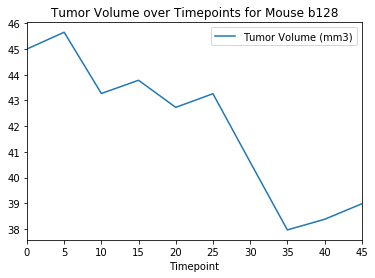

In [15]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse = clean_ms[clean_ms["Mouse ID"] == "b128"]
mouse.plot(kind="line", x = "Timepoint", y= "Tumor Volume (mm3)")
plt.title("Tumor Volume over Timepoints for Mouse b128")
plt.savefig("b128.png")

Text(0.5, 1.0, 'Weight and Average Tumor Volume for Capomulin')

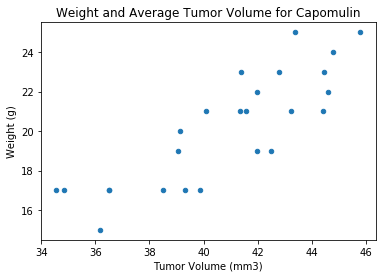

In [16]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin = clean_ms[clean_ms["Drug Regimen"] == "Capomulin"]
mouse_cap_group = capomulin.groupby(["Mouse ID"]).mean()

mouse_cap_group.plot(kind="scatter", x="Tumor Volume (mm3)", y="Weight (g)")
plt.title("Weight and Average Tumor Volume for Capomulin")

## Correlation and Regression

0.8419363424694718


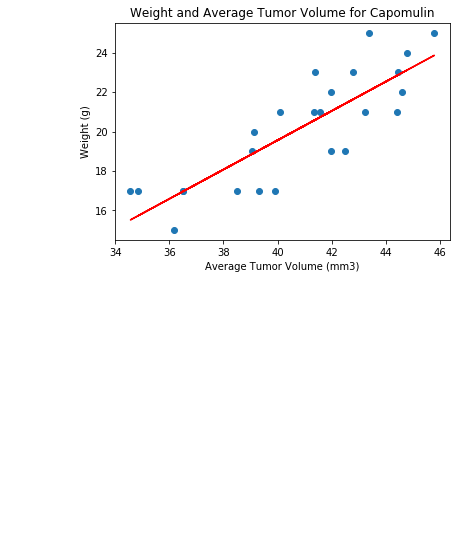

In [37]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

x_values = mouse_cap_group["Tumor Volume (mm3)"]
y_values = mouse_cap_group["Weight (g)"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x=x_values, y=y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

plt.annotate(line_eq,(30,0), fontsize=15, color="red")
plt.xlabel('Average Tumor Volume (mm3)')
plt.ylabel('Weight (g)')
plt.title("Weight and Average Tumor Volume for Capomulin")
print(rvalue)